# Bài tập Naive Bayes

## Sử dụng GaussianNB để phân nhóm cho tập Iris dataset
* dataset: 'Iris.csv'

## Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline  

## Loading dataset

In [2]:
import pandas as pd
data = pd.read_csv('Iris.csv')

In [3]:
data.iloc[2]

Id                         3
SepalLengthCm            4.7
SepalWidthCm             3.2
PetalLengthCm            1.3
PetalWidthCm             0.2
Species          Iris-setosa
Name: 2, dtype: object

There are 3 labels:
* `Iris-setosa`
* `Iris-versicolor`
* `Iris-virginica`

## Analyze dataset

In [4]:
data.shape

(150, 6)

In [5]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
data.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

## Distribution 3 types plots

In [11]:
count_Class = pd.value_counts(data["Species"], sort = True)

In [12]:
count_Class

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [13]:
type(count_Class)

pandas.core.series.Series

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64


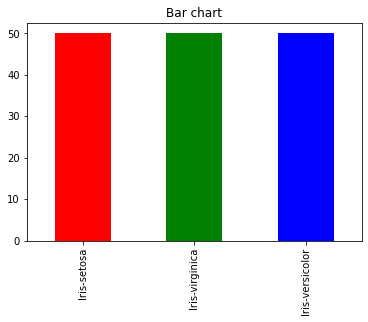

In [14]:
count_Class = pd.value_counts(data["Species"], sort = True)
print(count_Class)
count_Class.plot(kind = 'bar', color = ["red", "green", "blue"])
plt.title('Bar chart')
plt.show()

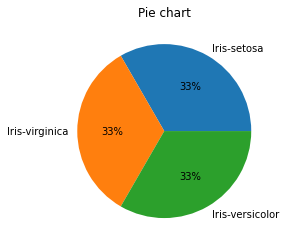

In [15]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

## Split dataset into training set & test set

In [16]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = data[feature_columns].values
y = data['Species'].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Build GaussianNB Classifier

In [18]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
# fit it to training data
clf.fit(X_train,y_train)
clf

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
# predict using test data
y_test_pred = clf.predict(X_test)
y_test_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype='<U15')

In [20]:
# Compute predicted probabilities: y_pred_prob
y_test_pred_prob = clf.predict_proba(X_test)
y_test_pred_prob

array([[4.01149696e-229, 2.18878438e-006, 9.99997811e-001],
       [4.22169416e-082, 9.99998304e-001, 1.69618390e-006],
       [1.00000000e+000, 7.16284995e-019, 3.68554763e-028],
       [8.35284952e-304, 1.04649020e-006, 9.99998954e-001],
       [1.00000000e+000, 8.66468390e-017, 4.25746157e-027],
       [3.37568623e-317, 1.56450314e-010, 1.00000000e+000],
       [1.00000000e+000, 1.12844157e-016, 5.44991578e-027],
       [1.56262696e-145, 7.74052109e-001, 2.25947891e-001],
       [4.43483233e-149, 9.07564955e-001, 9.24350453e-002],
       [3.24212000e-092, 9.99882109e-001, 1.17891111e-004],
       [1.98065482e-209, 5.29609631e-001, 4.70390369e-001],
       [1.01414563e-130, 9.43762575e-001, 5.62374248e-002],
       [2.14203039e-131, 9.98864361e-001, 1.13563851e-003],
       [1.55482433e-138, 9.49838641e-001, 5.01613586e-002],
       [3.38807588e-139, 9.88043864e-001, 1.19561365e-002],
       [1.00000000e+000, 4.35323671e-017, 9.62602787e-028],
       [5.23970312e-130, 9.87944980e-001

In [21]:
# predict using train data
y_train_pred = clf.predict(X_train)
y_train_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Ir

## Evaluation

### Tập test

In [22]:
print('Test-set confusion matrix:\n', confusion_matrix(y_test,y_test_pred)) 
print("Recall score: ", recall_score(y_test,y_test_pred, average = None))

Test-set confusion matrix:
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Recall score:  [1.         1.         0.83333333]


In [23]:
print("Precision score: ", precision_score(y_test,y_test_pred, average = None))
print("f1 score: ", f1_score(y_test,y_test_pred, average = None))

Precision score:  [1.         0.92857143 1.        ]
f1 score:  [1.         0.96296296 0.90909091]


In [24]:
print("Accuracy score: ", accuracy_score(y_test,y_test_pred))

Accuracy score:  0.9666666666666667


### Tập train

In [25]:
print('Train-set confusion matrix:\n', confusion_matrix(y_train,y_train_pred)) 
print("Recall score: ", recall_score(y_train,y_train_pred, average = None))

Train-set confusion matrix:
 [[39  0  0]
 [ 0 34  3]
 [ 0  3 41]]
Recall score:  [1.         0.91891892 0.93181818]


In [26]:
print("Precision score: ", precision_score(y_train,y_train_pred, average = None))
print("f1 score: ", f1_score(y_train,y_train_pred, average = None))

Precision score:  [1.         0.91891892 0.93181818]
f1 score:  [1.         0.91891892 0.93181818]


In [27]:
print("Accuracy score: ", accuracy_score(y_train,y_train_pred))

Accuracy score:  0.95
